In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle('clean_dummy_data.pkl')

In [3]:
df.head()

,Client Name,Order Result,Amount,Close Date,Business Type,Lead Source,Created Date,Loss Reason,Project Name,Project Location
0,Client 1,Lost order,5616.0,2019-04-22,New Business,Phone,2019-04-30 08:49:52,Price,Project 1,Abu Dhabi Region
1,Client 2,Lost order,1840.0,2019-01-29,NaN,NaN,2019-04-27 07:43:51,NaN,Project 2,Abu Dhabi
2,Client 3,Lost order,0.0,2019-01-21,NaN,NaN,2019-04-27 07:16:53,NaN,Project 3,Abu Dhabi
3,Client 4,Lost order,37370.0,2019-04-13,New Business,Phone,2019-04-29 13:46:46,No Decision / Non-Responsive,Project 4,Abu Dhabi
4,Client 5,Lost order,4720.0,2019-04-13,New Business,Phone,2019-04-29 12:33:56,Other,Project 5,Abu Dhabi


In [4]:
df_results = pd.DataFrame(df, columns = ['Order Result', 'Business Type', 'Lead Source', 'Loss Reason', 'Close Date'])

In [5]:
df_results.head()

,Order Result,Business Type,Lead Source,Loss Reason,Close Date
0,Lost order,New Business,Phone,Price,2019-04-22
1,Lost order,NaN,NaN,NaN,2019-01-29
2,Lost order,NaN,NaN,NaN,2019-01-21
3,Lost order,New Business,Phone,No Decision / Non-Responsive,2019-04-13
4,Lost order,New Business,Phone,Other,2019-04-13


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # sets up pretty plots
%matplotlib inline

### Spread of wins and losses by business type

In [7]:
df_results[['Order Result','Business Type']].groupby(["Order Result", 'Business Type'])['Order Result'].count().unstack('Business Type')

Business Type,Existing Business,New Business
Order Result,,
Lost order,44,58
Won order,25,7


In [8]:
df_type = df_results[['Order Result','Business Type']].groupby(["Order Result", 'Business Type'])['Order Result'].count().unstack('Business Type')

Text(0,0.5,'Number of Orders')

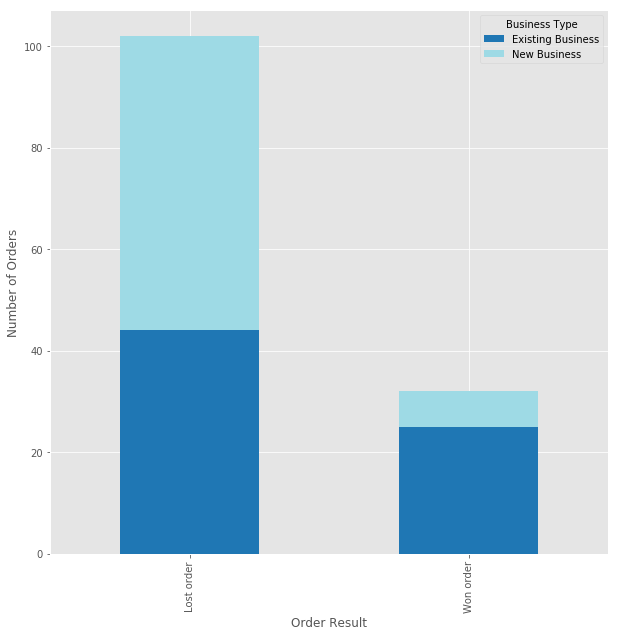

In [9]:
df_type.plot(kind = 'bar', stacked = True, figsize=(10, 10),colormap='tab20')
plt.ylabel('Number of Orders')

In [10]:
df_type1 = df_results[['Order Result','Business Type']].groupby(["Order Result", 'Business Type'])['Order Result'].count().unstack('Order Result')

Text(0,0.5,'Number of Orders')

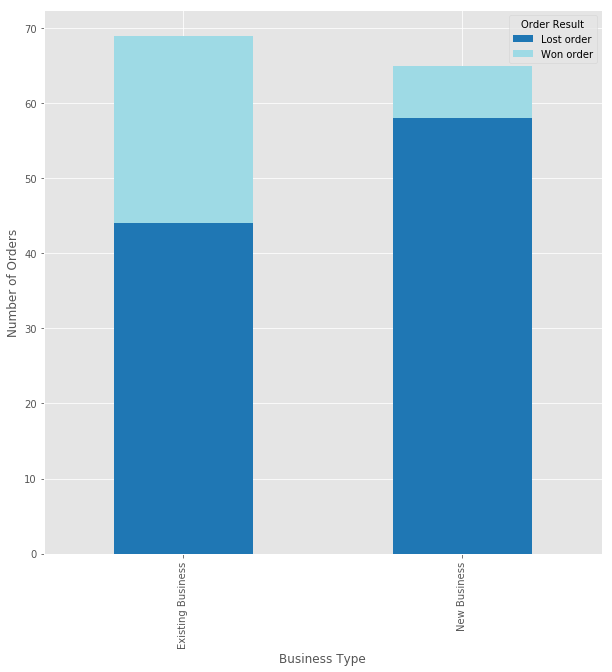

In [11]:
df_type1.plot(kind = 'bar', stacked = True, figsize=(10, 10),colormap='tab20')
plt.ylabel('Number of Orders')

### Spread of wins and losses by lead source

In [12]:
df_results[['Order Result','Lead Source']].groupby(["Order Result", 'Lead Source'])['Order Result'].count().unstack('Lead Source')

Lead Source,Email,In person meeting,Phone,Website
Order Result,,,,
Lost order,49,5,29,20
Won order,15,3,12,3


In [13]:
df_lead = df_results[['Order Result','Lead Source']].groupby(["Order Result", 'Lead Source'])['Order Result'].count().unstack('Lead Source')

Text(0,0.5,'Number of Orders')

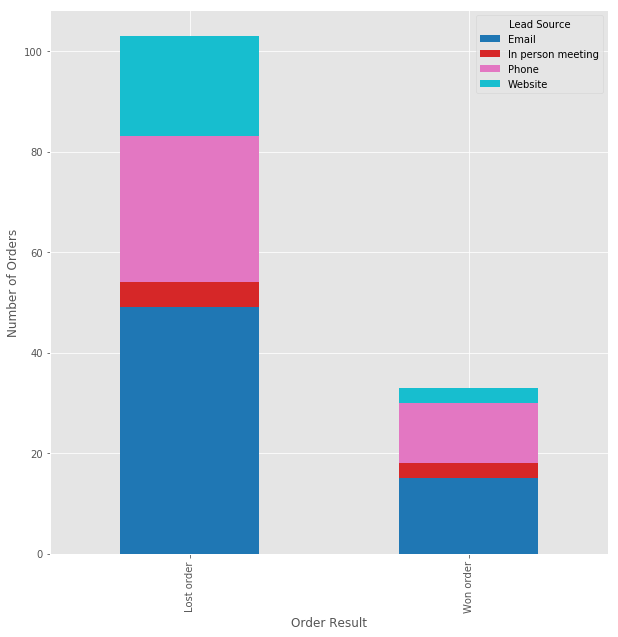

In [14]:
df_lead.plot(kind = 'bar', stacked = True, figsize=(10, 10),colormap='tab10')
plt.ylabel('Number of Orders')

In [15]:
df_lead1 = df_results[['Order Result','Lead Source']].groupby(["Order Result", 'Lead Source'])['Order Result'].count().unstack('Order Result')

Text(0,0.5,'Number of Orders')

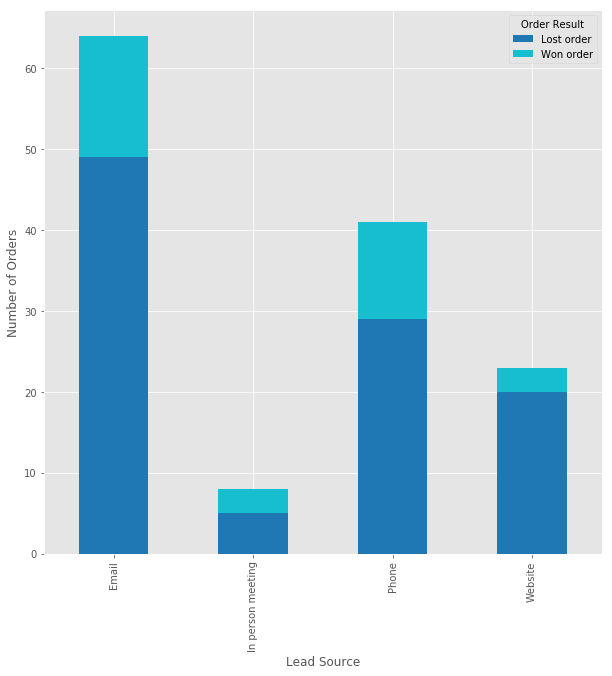

In [16]:
df_lead1.plot(kind = 'bar', stacked = True, figsize=(10, 10),colormap='tab10')
plt.ylabel('Number of Orders')

### Distribution of Loss Reason

Text(0.5,1,'Order Loss Reason')

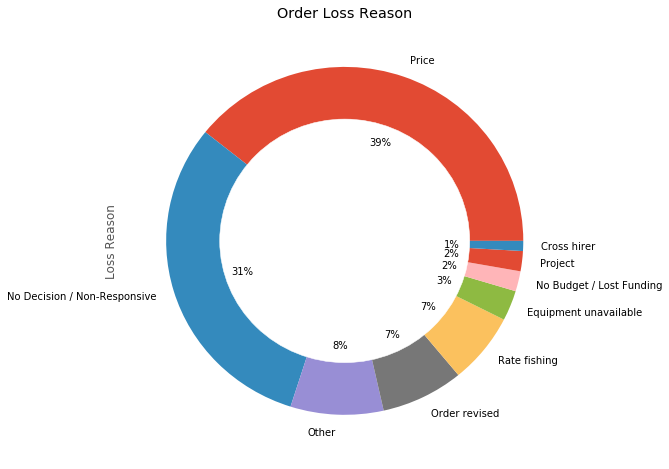

In [18]:
df_results['Loss Reason'].value_counts().plot(kind = 'pie', figsize=(8, 8), autopct='%1.0f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Order Loss Reason')

### Order losses over time 

In [19]:
df_2019 = df_results[(df_results['Close Date'].dt.year == 2019)]# df1 should only contain rows where the year is 2019
df_2019['month'] = df_2019['Close Date'].dt.month.sort_values()

C:\Users\huzmu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df_2019.sort_values(by='month', inplace = True)

C:\Users\huzmu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_2019.head()

,Order Result,Business Type,Lead Source,Loss Reason,Close Date,month
78,Lost order,NaN,NaN,Price,2019-01-03,1
33,Lost order,NaN,NaN,NaN,2019-01-05,1
68,Lost order,NaN,NaN,NaN,2019-01-23,1
175,Lost order,NaN,NaN,NaN,2019-01-05,1
176,Lost order,NaN,NaN,NaN,2019-01-05,1


In [22]:
df_2019['Order Result'].value_counts()

Lost order    175
Won order      47
Name: Order Result, dtype: int64

In [23]:
df_2019_losses = df_2019[(df_2019['Order Result'] == 'Lost order')]

In [24]:
df_2019_losses.head()

,Order Result,Business Type,Lead Source,Loss Reason,Close Date,month
78,Lost order,NaN,NaN,Price,2019-01-03,1
33,Lost order,NaN,NaN,NaN,2019-01-05,1
68,Lost order,NaN,NaN,NaN,2019-01-23,1
175,Lost order,NaN,NaN,NaN,2019-01-05,1
176,Lost order,NaN,NaN,NaN,2019-01-05,1


In [25]:
df_2019_wins = df_2019[(df_2019['Order Result'] == 'Won order')]

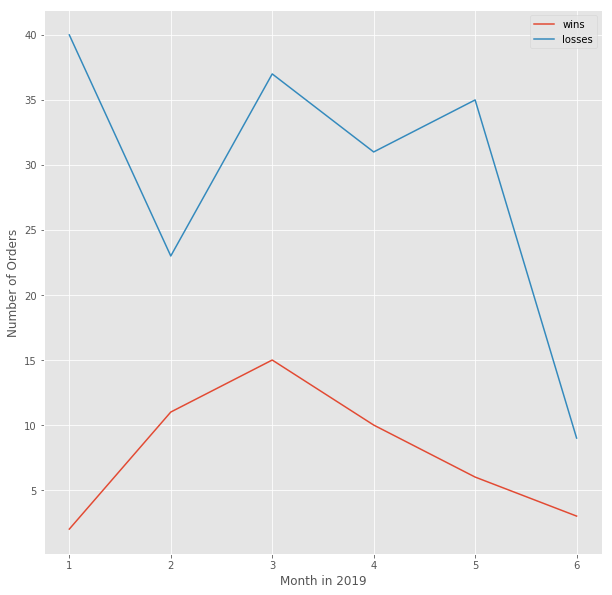

In [26]:
df_2019_wins['month'].value_counts().sort_index().plot(kind='line', figsize=(10,10), label='wins')
df_2019_losses['month'].value_counts().sort_index().plot(kind='line', figsize=(10,10), label='losses')
plt.xlabel('Month in 2019')
plt.ylabel('Number of Orders')
plt.legend()

In [27]:
#####

In [28]:
df.head()

,Client Name,Order Result,Amount,Close Date,Business Type,Lead Source,Created Date,Loss Reason,Project Name,Project Location
0,Client 1,Lost order,5616.0,2019-04-22,New Business,Phone,2019-04-30 08:49:52,Price,Project 1,Abu Dhabi Region
1,Client 2,Lost order,1840.0,2019-01-29,NaN,NaN,2019-04-27 07:43:51,NaN,Project 2,Abu Dhabi
2,Client 3,Lost order,0.0,2019-01-21,NaN,NaN,2019-04-27 07:16:53,NaN,Project 3,Abu Dhabi
3,Client 4,Lost order,37370.0,2019-04-13,New Business,Phone,2019-04-29 13:46:46,No Decision / Non-Responsive,Project 4,Abu Dhabi
4,Client 5,Lost order,4720.0,2019-04-13,New Business,Phone,2019-04-29 12:33:56,Other,Project 5,Abu Dhabi


In [29]:
dfx = pd.DataFrame(df, columns = ['Amount', 'Order Result', 'Close Date'])

In [30]:
dfx.head()

,Amount,Order Result,Close Date
0,5616.0,Lost order,2019-04-22
1,1840.0,Lost order,2019-01-29
2,0.0,Lost order,2019-01-21
3,37370.0,Lost order,2019-04-13
4,4720.0,Lost order,2019-04-13


In [31]:
dfx_wins = dfx[(dfx['Order Result']=='Won order')]
dfx_loss = dfx[(dfx['Order Result']=='Lost order')]

In [32]:
dfx_wins = dfx_wins[(dfx_wins['Close Date'].dt.year==2019)]
dfx_loss = dfx_loss[(dfx_loss['Close Date'].dt.year==2019)]

In [33]:
dfx_wins['month'] = dfx['Close Date'].dt.month
dfx_loss['month'] = dfx['Close Date'].dt.month

In [34]:
dfx_wins.drop(['Order Result', 'Close Date'], axis=1, inplace=True)
dfx_wins.rename(columns={'Amount':'Won Amount'}, inplace =True)

dfx_loss.drop(['Order Result', 'Close Date'], axis=1, inplace=True)
dfx_loss.rename(columns={'Amount':'Lost Amount'}, inplace=True)

In [35]:
dfx_wins_group = dfx_wins.groupby(['month']).sum()
dfx_loss_group = dfx_loss.groupby(['month']).sum()

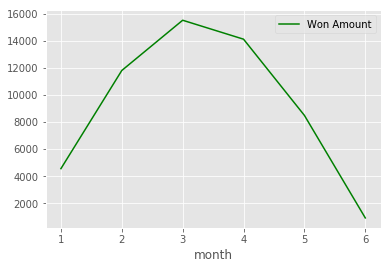

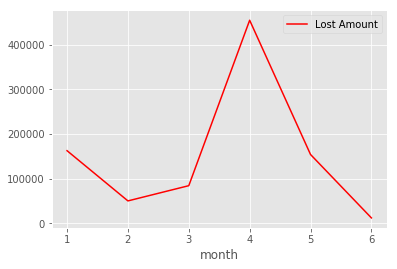

In [36]:
dfx_wins_group.plot(kind='line', color='green')
dfx_loss_group.plot(kind='line', color='red')

In [ ]:
######

Dashboard plot below

In [ ]:
df_2019_wins['month'].value_counts().sort_index().plot(kind='line', label='wins')
plt.xlabel('Month')
plt.title('2019 Monthly Orders')

In [ ]:
df_2019_wins.info()

In [ ]:
df_2019_wins

In [ ]:
df_2019_grouped=df_2019_wins.drop(columns=['Business Type', 'Lead Source', 'Loss Reason', 'Close Date']).groupby(['month']).count()

In [ ]:
df_2019_grouped